In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATA SPHERE ELECTION DATASET.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVERTOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [3]:
print('Number of rows and columns :',df.shape) # Number of rows and columns

Number of rows and columns : (2263, 19)


In [34]:
df.describe()

,WINNER,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVERTOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [4]:
df1 = df[df['PARTY']!= 'NOTA']
percentage_missing_values = round(df1.isnull().sum()*100/len(df1),2).reset_index()
percentage_missing_values.columns = ['column_name','percentage_missing_values']
percentage_missing_values = percentage_missing_values.sort_values('percentage_missing_values',ascending = False)
percentage_missing_values

,column_name,percentage_missing_values
0,STATE,0.0
10,EDUCATION,0.0
17,OVERTOTAL VOTES POLLED IN CONSTITUENCY,0.0
16,OVER TOTAL ELECTORS IN CONSTITUENCY,0.0
15,TOTAL VOTES,0.0
14,POSTAL VOTES,0.0
13,GENERAL VOTES,0.0
12,LIABILITIES,0.0
11,ASSETS,0.0
9,CATEGORY,0.0


In [5]:
constituencies_per_state = df.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = False)
fig = px.bar(constituencies_per_state, x='STATE', y='CONSTITUENCY', color='CONSTITUENCY', height=600)
fig.show()

In [6]:
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()
def vote_share(row):
    if row['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return row['PARTY']
df['Party New'] = df.apply(vote_share,axis =1)
counts = df.groupby('Party New')['TOTAL VOTES'].sum(sort=True)
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [7]:
candidates_per_party = df.PARTY.value_counts().reset_index().rename(columns = {'index':'Party','PARTY':'Total Candidates'}).head(50)
candidates_per_party = candidates_per_party[candidates_per_party['Party'] != 'NOTA']
fig = px.bar(candidates_per_party, x='Party', y='Total Candidates', color='Total Candidates', height=500)
fig.show()

In [8]:
winning_candidates_per_party = df.groupby(['PARTY','SYMBOL'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
winning_candidates_per_party = winning_candidates_per_party[winning_candidates_per_party['WINNER'] > 0]
fig = px.bar(winning_candidates_per_party, x='PARTY', y='WINNER',hover_data =['SYMBOL'], color='WINNER', height=500)
fig.show()

In [9]:
fig = px.histogram(df, x="AGE")
fig.show()

In [10]:
fig = px.histogram(df.dropna(), x="AGE", y="WINNER", color="GENDER", marginal="violin",hover_data=df.columns)
fig.show()

In [11]:
df_winners = df[df['WINNER']==1]
df_winners = df_winners.sort_values('AGE').head(10)
fig = px.bar(df_winners, x='NAME', y='AGE', color='AGE', height=500, hover_data=['PARTY','SYMBOL','CONSTITUENCY','STATE'])
fig.show()

In [12]:
df_winners = df[df['WINNER']==1]
df_winners = df_winners.sort_values('AGE',ascending=False).head(10)
fig = px.bar(df_winners, x='NAME', y='AGE', color='AGE', height=500, hover_data=['PARTY','SYMBOL','CONSTITUENCY','STATE'])
fig.show()

In [13]:
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].str.replace('Not Available','0')
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].fillna(0)
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int)
criminal_cases = df[(df['CRIMINAL CASES'] != 'Not Available') & (df['CRIMINAL CASES'].notnull())]
criminal_cases = criminal_cases.groupby('PARTY')['CRIMINAL CASES'].sum().reset_index().sort_values('CRIMINAL CASES',ascending=False).head(30)
fig = px.bar(criminal_cases, x='PARTY', y='CRIMINAL CASES', color='CRIMINAL CASES', height=500)
fig.show()

In [14]:
df['EDUCATION'] = df['EDUCATION'].str.replace('Post Graduate\n','Post Graduate')
df['EDUCATION'] = df['EDUCATION'].fillna('Others') 
education = df[df['EDUCATION'] != 'Not Available']
education = education['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
fig = px.bar(education, x='EDUCATION', y='COUNT', color='COUNT', height=500)
fig.show()

In [15]:
won_educated_candidates = df[df['WINNER']==1]
fig = px.bar(won_educated_candidates, x='EDUCATION', y='WINNER', color='EDUCATION', height=500).update_xaxes(categoryorder = "total descending")
fig.show()

In [16]:
df_criminal_cases = df.loc[(df['CRIMINAL CASES'].notnull()) & (df['CRIMINAL CASES'] != 'Not Available')]
def criminal_cases(row):
    if row['CRIMINAL CASES'] == 0:
        return 'No'
    else:
        return 'Yes'
df_criminal_cases['HAS CRIMINAL CASE'] = df_criminal_cases.apply(criminal_cases,axis = 1)
df_criminal_cases_count = df_criminal_cases.groupby(['HAS CRIMINAL CASE','WINNER']).size().reset_index()
df_criminal_cases_count.columns = ['HAS CRIMINAL CASE','WINNER','COUNT']
# pivot_df_criminal_cases_count = df_criminal_cases_count.pivot(index='HAS CRIMINAL CASE', columns='WINNER', values='COUNT')
# pivot_df_criminal_cases_count.plot.bar(stacked=True,figsize=(10,7))
# plt.xticks(rotation=0)
# plt.show()
fig = px.bar(df_criminal_cases_count, x="HAS CRIMINAL CASE", y="COUNT", color='WINNER')
fig.show()

In [17]:
df_votes_perct_constituency = df.groupby(['STATE','CONSTITUENCY','TOTAL ELECTORS'])['TOTAL VOTES'].sum().reset_index()
df_votes_perct_constituency['% VOTED IN CONSTITUENCY'] = round(df_votes_perct_constituency['TOTAL VOTES']*100/df_votes_perct_constituency['TOTAL ELECTORS'],2)
df_voters_state = df[['STATE','CONSTITUENCY','TOTAL ELECTORS']].drop_duplicates()
df_voters_state = df_voters_state.groupby('STATE')['TOTAL ELECTORS'].sum().reset_index()
df_votes_state = df.groupby('STATE')['TOTAL VOTES'].sum().reset_index().sort_values('TOTAL VOTES',ascending = False)
df_votes_perct_state = pd.merge(df_votes_state,df_voters_state, on ='STATE',how = 'left')
df_votes_perct_state['% VOTED IN STATE'] = round(df_votes_perct_state['TOTAL VOTES']*100/df_votes_perct_state['TOTAL ELECTORS'],2)
df_votes_perct_state = df_votes_perct_state.sort_values('% VOTED IN STATE',ascending = False)
fig = px.bar(df_votes_perct_state, x='STATE', y='% VOTED IN STATE', color='% VOTED IN STATE', height=500)
fig.show()

In [18]:
fig = px.bar(df_votes_state, x='STATE', y='TOTAL VOTES', color='TOTAL VOTES', height=500)
fig.show()

In [19]:
df_assets = df.copy()
df_assets[['ASSETS2','ASSETS_VALUE']] = df_assets['ASSETS'].str.split('~',expand=True)
df_assets.drop(['ASSETS2'],axis =1,inplace=True)
df_assets = df_assets[df_assets['ASSETS_VALUE'].notnull()]
def asset_range(row):
    if row['ASSETS_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['ASSETS_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['ASSETS_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'

df_assets['ASSETS_RANGE'] = df_assets.apply(asset_range,axis =1)
df_assets['COUNT'] = 1
df_assets = df_assets[df_assets['ASSETS_RANGE'] != 'NAN']
counts = df_assets.groupby('ASSETS_RANGE')['COUNT'].sum(sort=True)
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Assests of Candidates')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [20]:
df_category = df['CATEGORY'].value_counts().reset_index()
df_category.columns = ['CATEGORY','COUNT']
fig = px.bar(df_category, x='CATEGORY', y='COUNT', color='CATEGORY', height=500)
fig.show()

In [21]:
df_gender = df['GENDER'].value_counts().reset_index()
df_gender.columns = ['GENDER','COUNT']
pie = go.Pie(labels=df_gender['GENDER'], values=df_gender['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Male vs Female Ratio - All Candidates')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [22]:
df_gender_won =df[df['WINNER'] == 1]
df_gender_won = df_gender_won['GENDER'].value_counts().reset_index()
df_gender_won.columns = ['GENDER','COUNT']
pie = go.Pie(labels=df_gender_won['GENDER'], values=df_gender_won['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Male vs Female Ratio - Winners')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [23]:
df = df[df['PARTY']!= 'NOTA']
df[['ASSETS2','ASSETS_VALUE']] = df['ASSETS'].str.split('~',expand=True)
df.drop(['ASSETS2'],axis =1,inplace=True)
df = df[df['ASSETS_VALUE'].notnull()]
df['ASSETS_RANGE'] = df.apply(asset_range,axis =1)

df[['LIABILITY2','LIABILITY_VALUE']] = df['LIABILITIES'].str.split('~',expand=True)
df.drop(['LIABILITY2'],axis =1,inplace=True)
df = df[df['LIABILITY_VALUE'].notnull()]

def liability_range(row):
    if row['LIABILITY_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['LIABILITY_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['LIABILITY_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'
df['LIABILITY_RANGE'] = df.apply(liability_range,axis =1)

In [24]:
df1 = df[['STATE','CONSTITUENCY','WINNER','Party New','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS_RANGE','LIABILITY_RANGE']]
cat_cols = ['STATE','CONSTITUENCY','Party New','SYMBOL','GENDER','CATEGORY','EDUCATION','ASSETS_RANGE','LIABILITY_RANGE']
num_cols = ['CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS']

In [25]:
df_winner = df1['WINNER'].value_counts().reset_index()
df_winner.columns = ['RESULT','COUNT']
pie = go.Pie(labels=df_winner['RESULT'], values=df_winner['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Total Candidates vs Winners')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [26]:
dataset = pd.get_dummies(df1, columns = cat_cols)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = num_cols
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,WINNER,CRIMINAL CASES,AGE,TOTAL VOTES,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,STATE_Andhra Pradesh,STATE_Arunachal Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Dadra & Nagar Haveli,STATE_Daman & Diu,STATE_Goa,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Jammu & Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Lakshadweep,STATE_Madhya Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Meghalaya,STATE_Mizoram,STATE_NCT OF Delhi,STATE_Nagaland,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal,CONSTITUENCY_ADILABAD,CONSTITUENCY_AGRA,CONSTITUENCY_AHMADNAGAR,CONSTITUENCY_AHMEDABAD EAST,CONSTITUENCY_AHMEDABAD WEST,CONSTITUENCY_AJMER,CONSTITUENCY_AKBARPUR,CONSTITUENCY_AKOLA,CONSTITUENCY_ALAPPUZHA,CONSTITUENCY_ALATHUR,CONSTITUENCY_ALIGARH,CONSTITUENCY_ALIPURDUARS,CONSTITUENCY_ALLAHABAD,CONSTITUENCY_ALMORA,CONSTITUENCY_ALWAR,CONSTITUENCY_AMALAPURAM,CONSTITUENCY_AMBALA,CONSTITUENCY_AMBEDKAR NAGAR,CONSTITUENCY_AMETHI,CONSTITUENCY_AMRAVATI,CONSTITUENCY_AMRELI,CONSTITUENCY_AMRITSAR,CONSTITUENCY_AMROHA,CONSTITUENCY_ANAKAPALLI,CONSTITUENCY_ANAND,CONSTITUENCY_ANANDPUR SAHIB,CONSTITUENCY_ANANTAPUR,CONSTITUENCY_ANANTNAG,CONSTITUENCY_ANDAMAN & NICOBAR ISLANDS,CONSTITUENCY_AONLA,CONSTITUENCY_ARAKKONAM,CONSTITUENCY_ARAMBAGH,CONSTITUENCY_ARANI,CONSTITUENCY_ARARIA,CONSTITUENCY_ARRAH,CONSTITUENCY_ARUKU,CONSTITUENCY_ARUNACHAL EAST,CONSTITUENCY_ARUNACHAL WEST,CONSTITUENCY_ASANSOL,CONSTITUENCY_ASKA,CONSTITUENCY_ATTINGAL,CONSTITUENCY_AURANGABAD,CONSTITUENCY_AUTONOMOUS DISTRICT,CONSTITUENCY_AZAMGARH,CONSTITUENCY_BADAUN,CONSTITUENCY_BAGALKOT,CONSTITUENCY_BAGHPAT,CONSTITUENCY_BAHARAMPUR,CONSTITUENCY_BAHRAICH,CONSTITUENCY_BALAGHAT,CONSTITUENCY_BALASORE,CONSTITUENCY_BALLIA,CONSTITUENCY_BALURGHAT,CONSTITUENCY_BANASKANTHA,CONSTITUENCY_BANDA,CONSTITUENCY_BANGALORE CENTRAL,CONSTITUENCY_BANGALORE NORTH,CONSTITUENCY_BANGALORE RURAL,CONSTITUENCY_BANGALORE SOUTH,CONSTITUENCY_BANGAON,CONSTITUENCY_BANKA,CONSTITUENCY_BANKURA,CONSTITUENCY_BANSGAON,CONSTITUENCY_BANSWARA,CONSTITUENCY_BAPATLA,CONSTITUENCY_BARABANKI,CONSTITUENCY_BARAMATI,CONSTITUENCY_BARAMULLA,CONSTITUENCY_BARASAT,CONSTITUENCY_BARDHAMAN DURGAPUR,CONSTITUENCY_BARDHAMAN PURBA,CONSTITUENCY_BARDOLI,CONSTITUENCY_BAREILLY,CONSTITUENCY_BARGARH,CONSTITUENCY_BARMER,CONSTITUENCY_BARPETA,CONSTITUENCY_BARRACKPORE,CONSTITUENCY_BASIRHAT,CONSTITUENCY_BASTAR,CONSTITUENCY_BASTI,CONSTITUENCY_BATHINDA,CONSTITUENCY_BEED,CONSTITUENCY_BEGUSARAI,CONSTITUENCY_BELGAUM,CONSTITUENCY_BELLARY,CONSTITUENCY_BERHAMPUR,CONSTITUENCY_BETUL,CONSTITUENCY_BHADOHI,CONSTITUENCY_BHADRAK,CONSTITUENCY_BHAGALPUR,CONSTITUENCY_BHANDARA - GONDIYA,CONSTITUENCY_BHARATPUR,CONSTITUENCY_BHARUCH,CONSTITUENCY_BHAVNAGAR,CONSTITUENCY_BHILWARA,CONSTITUENCY_BHIND,CONSTITUENCY_BHIWANDI,CONSTITUENCY_BHIWANI-MAHENDRAGARH,CONSTITUENCY_BHONGIR,CONSTITUENCY_BHOPAL,CONSTITUENCY_BHUBANESWAR,CONSTITUENCY_BIDAR,CONSTITUENCY_BIJAPUR,CONSTITUENCY_BIJNOR,CONSTITUENCY_BIKANER (SC),CONSTITUENCY_BILASPUR,CONSTITUENCY_BIRBHUM,CONSTITUENCY_BISHNUPUR,CONSTITUENCY_BOLANGIR,CONSTITUENCY_BOLPUR,CONSTITUENCY_BULANDSHAHR,CONSTITUENCY_BULDHANA,CONSTITUENCY_BUXAR,CONSTITUENCY_CHALAKUDY,CONSTITUENCY_CHAMARAJANAGAR,CONSTITUENCY_CHANDAULI,CONSTITUENCY_CHANDIGARH,CONSTITUENCY_CHANDNI CHOWK,CONSTITUENCY_CHANDRAPUR,CONSTITUENCY_CHATRA,CONSTITUENCY_CHENNAI CENTRAL,CONSTITUENCY_CHENNAI NORTH,CONSTITUENCY_CHENNAI SOUTH,CONSTITUENCY_CHEVELLA,CONSTITUENCY_CHHINDWARA,CONSTITUENCY_CHHOTA UDAIPUR,CONSTITUENCY_CHIDAMBARAM,CONSTITUENCY_CHIKKBALLAPUR,CONSTITUENCY_CHIKKODI,CONSTITUENCY_CHITRADURGA,CONSTITUENCY_CHITTOOR,CONSTITUENCY_CHITTORGARH,CONSTITUENCY_CHURU,CONSTITUENCY_COIMBATORE,CONSTITUENCY_COOCH BEHAR,CONSTITUENCY_CUDDALORE,CONSTITUENCY_CUTTACK,CONSTITUENCY_DADRA AND NAGAR HAVELI,CONSTITUENCY_DAHOD,CONSTITUENCY_DAKSHINA KANNADA,CONSTITUENCY_DAMAN & DIU,CONSTITUENCY_DAMOH,CONSTITUENCY_DARBHANGA,CONSTITUENCY_DARJEELING,CONSTIT

In [28]:
from sklearn.utils import resample
df_majority = dataset[dataset.WINNER == 0]
df_minority = dataset[dataset.WINNER == 1]
df_minority_upsampled = resample(df_minority, replace = True,n_samples = 1452, random_state = 0) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.WINNER.value_counts()

1    1452
0    1452
Name: WINNER, dtype: int64

In [30]:
y = df_upsampled['WINNER']
X = df_upsampled.drop(['WINNER'], axis = 1)

Text(0.5, 1.0, 'Random Forest Classifier scores for different K values')

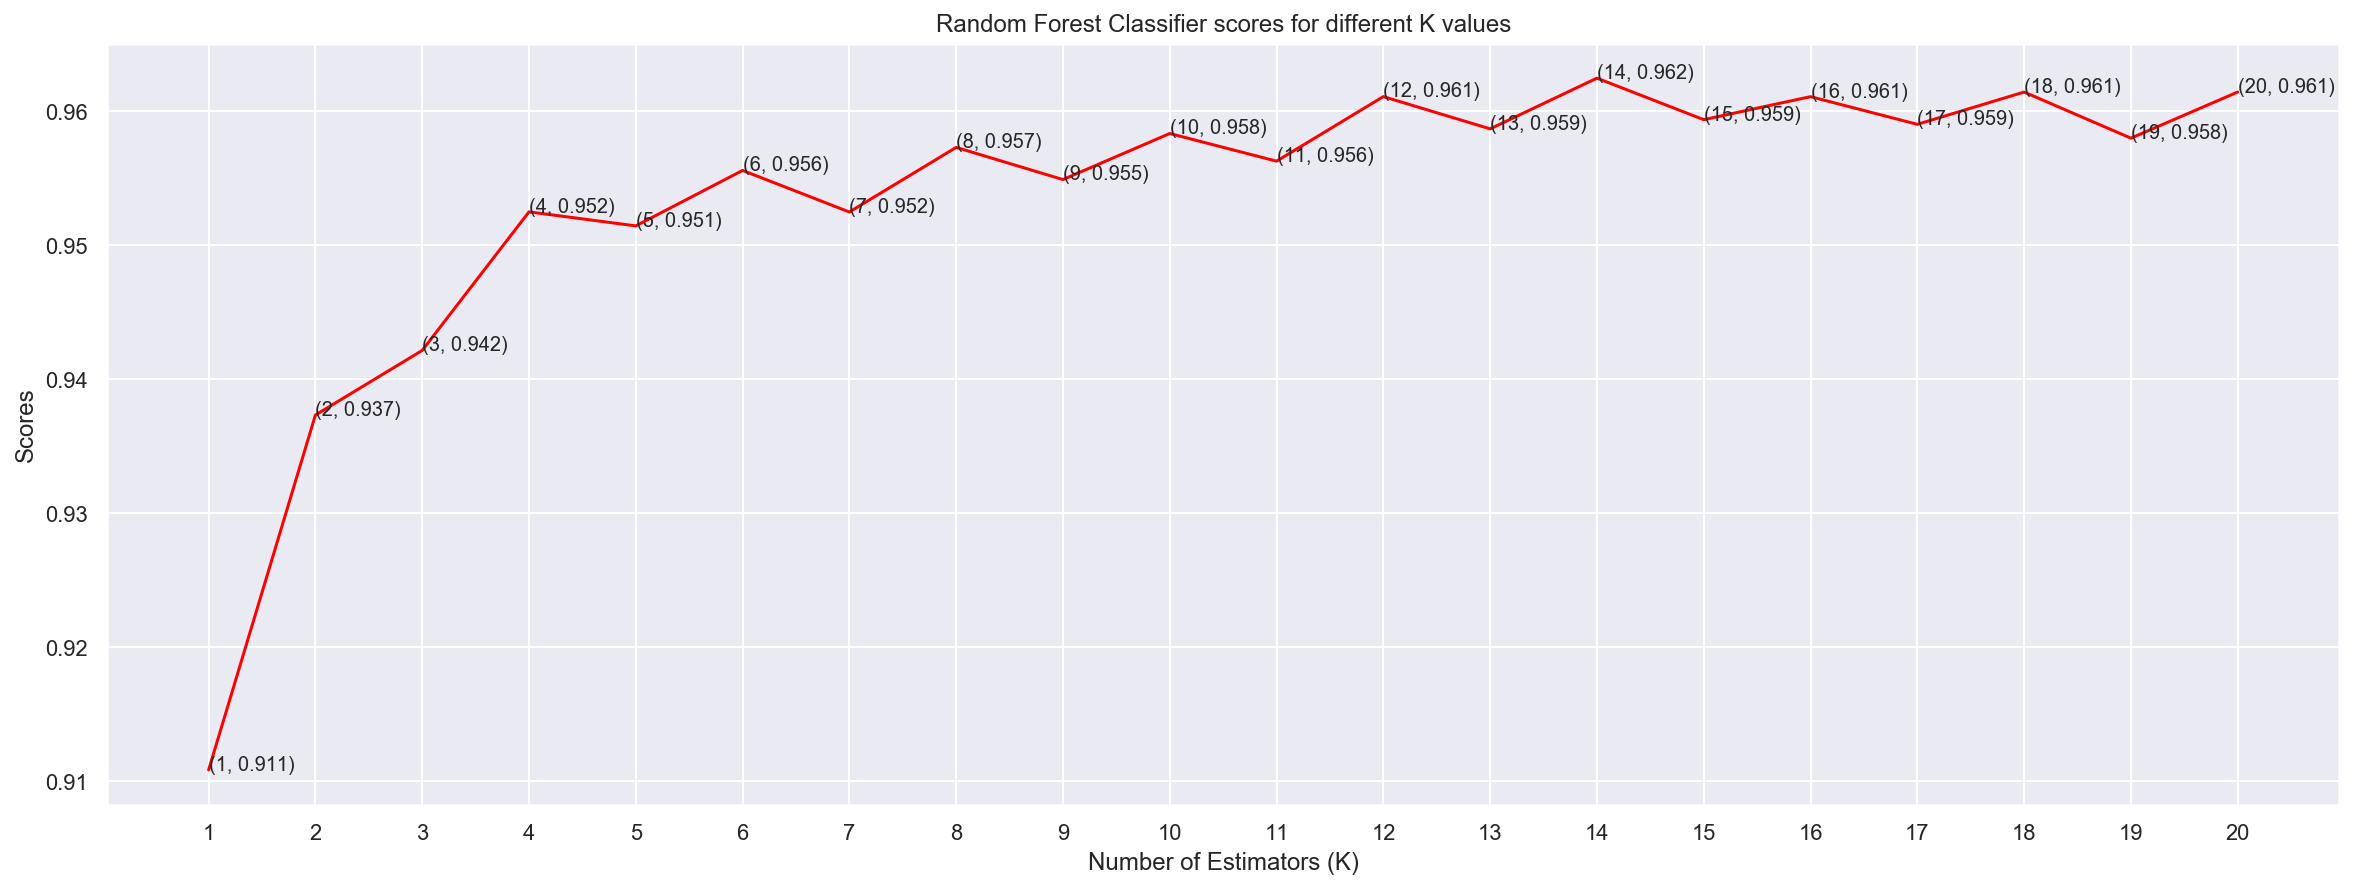

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_scores = []
for k in range(1,21):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rfc_scores.append(score.mean())
plt.figure(figsize =(20,7))
plt.plot([k for k in range(1, 21)], rfc_scores, color = 'red')
for i in range(1,21):
    plt.text(i, rfc_scores[i-1], (i, round(rfc_scores[i-1],3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different K values')

In [32]:
randomforest_classifier= RandomForestClassifier(n_estimators=14,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 96.2478
